# Visualization of tail dependence in copulas

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import norm

from pyscenarios import gaussian_copula, t_copula, tail_dependence

### Gaussian Copula and Student T Copula

<Axes: >

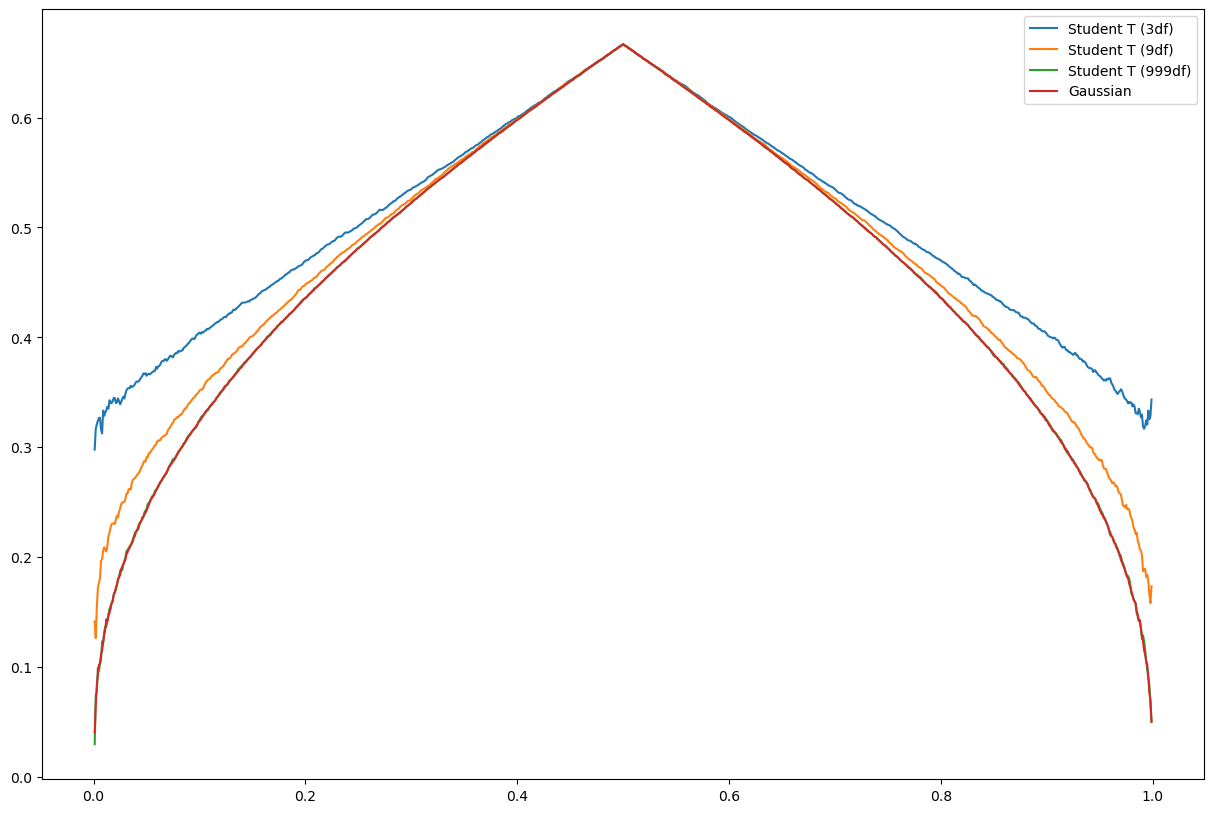

In [2]:
cov = [[1.0, 0.5], [0.5, 1.0]]

s3 = norm.cdf(t_copula(cov, 3, 100000, rng="Sobol"))
s9 = norm.cdf(t_copula(cov, 9, 100000, rng="Sobol"))
s999 = norm.cdf(t_copula(cov, 999, 100000, rng="Sobol"))
sg = norm.cdf(gaussian_copula(cov, 100000, rng="Sobol"))

q = np.arange(0.001, 1, 0.001)
d3 = tail_dependence(s3[:, 0], s3[:, 1], q)
d9 = tail_dependence(s9[:, 0], s9[:, 1], q)
d999 = tail_dependence(s999[:, 0], s999[:, 1], q)
dg = tail_dependence(sg[:, 0], sg[:, 1], q)

df = pd.DataFrame(
    [d3, d9, d999, dg],
    columns=q,
    index=[
        "Student T (3df)",
        "Student T (9df)",
        "Student T (999df)",
        "Gaussian",
    ],
).T
df.plot(figsize=(15, 10))

### IT Copula

<Axes: >

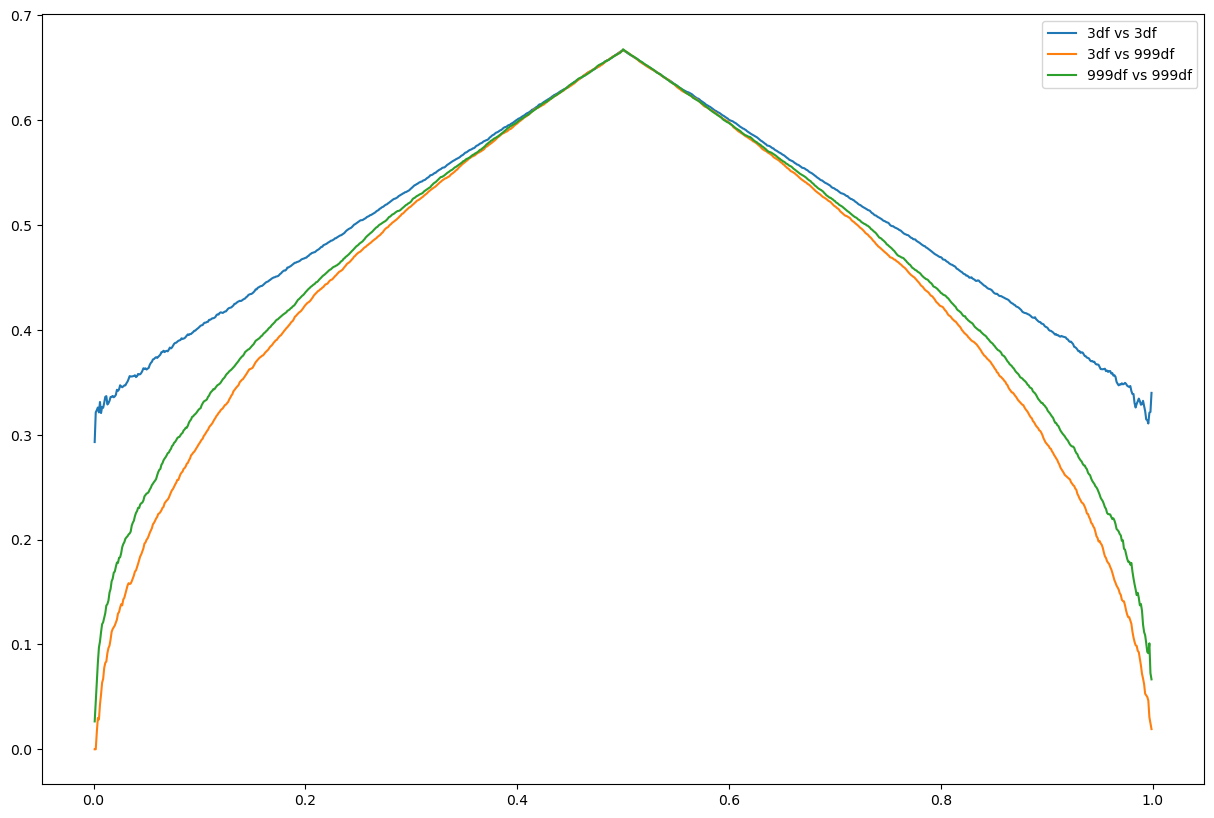

In [3]:
cov = [
    [1.0, 0.5, 0.5, 0.5],
    [0.5, 1.0, 0.5, 0.5],
    [0.5, 0.5, 1.0, 0.5],
    [0.5, 0.5, 0.5, 1.0],
]

s = norm.cdf(t_copula(cov, [3, 3, 999, 999], 100000, rng="Sobol"))

d33 = tail_dependence(s[:, 0], s[:, 1], q)
d39 = tail_dependence(s[:, 1], s[:, 2], q)
d99 = tail_dependence(s[:, 2], s[:, 3], q)

df = pd.DataFrame(
    [d33, d39, d99],
    columns=q,
    index=[
        "3df vs 3df",
        "3df vs 999df",
        "999df vs 999df",
    ],
).T
df.plot(figsize=(15, 10))